[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/zhujisheng/learn_python/blob/master/10.音乐/1.LibRosa使用基础.ipynb)

[《Python应用实战》视频课程](https://study.163.com/course/courseMain.htm?courseId=1209533804&share=2&shareId=400000000624093)

# LibRosa使用基础

难度：★★★★☆

## 环境准备

#### [LibROSA库](https://librosa.github.io/librosa/index.html)

LibROSA是一个音乐与音频处理的python库。

`pip install librosa`

#### FFMPEG

如果你需要读除了wave格式外的其它类型音频文件，需要[安装ffmpeg](https://github.com/zhujisheng/learn_python/blob/master/09.%E5%A3%B0%E9%9F%B3%E5%A4%84%E7%90%86/6.%E5%A3%B0%E9%9F%B3%E7%BC%96%E8%BE%91.md#pydub%E5%BA%93)。

#### Jupyter Notebook

- 本机运行

  Python编程环境之《[浏览器中的Python——Jupyter](../00.Python编程环境/4.浏览器中的Python——Jupyter.md)》

- 云端运行

  科学计算与作图之《[基础环境准备](../08.科学计算与作图/1.基础环境准备.ipynb)》

#### 下载一些音乐样例

In [ ]:
import os, urllib
filenames = ['audio/simple_piano.wav']
url = "https://github.com/zhujisheng/learn_python/raw/master/09.%E5%A3%B0%E9%9F%B3%E5%A4%84%E7%90%86/"

if not os.path.exists('audio'):
    os.mkdir('audio')

for f in filenames:
    urllib.request.urlretrieve(url+f, filename=f)

In [ ]:
ls audio

#### 包含头文件

In [42]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd

## 加载声音文件并播放

In [75]:
x, sr = librosa.load('audio/simple_piano.wav')

ipd.Audio(x, rate=sr)

## 生成单一频率的声音

In [35]:
# 声音的时长、频率和采样率
T = 2.0
frequency = 440.0
sr = 22050

In [36]:
# 使用正弦函数生成
import numpy
t = numpy.linspace(0, T, int(T*sr1), endpoint=False)
y = numpy.sin(2*numpy.pi*frequency*t)

ipd.Audio(y, rate=sr)

In [46]:
# 使用librosa库中的tone函数完成
y=librosa.tone(frequency,sr=sr,duration=2)
ipd.Audio(y, rate=sr)

## 生成其它声音

In [41]:
z=librosa.clicks([0.5,1.5,2.5], sr=22050, click_freq=880.0)
ipd.Audio(z, rate=22050)

## 声音波形图

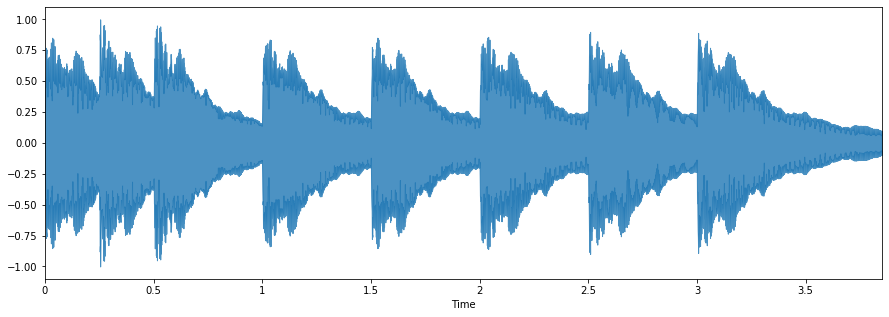

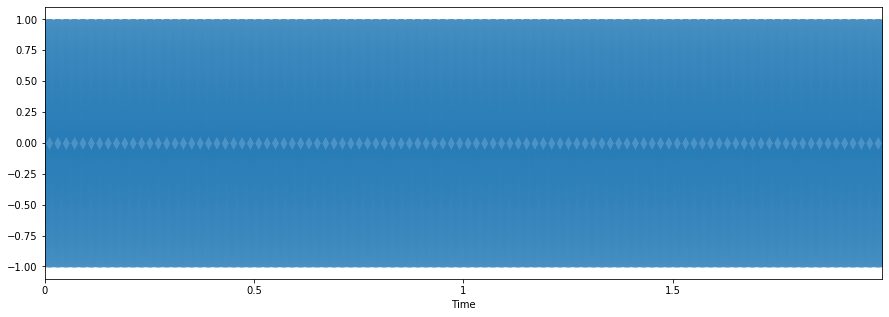

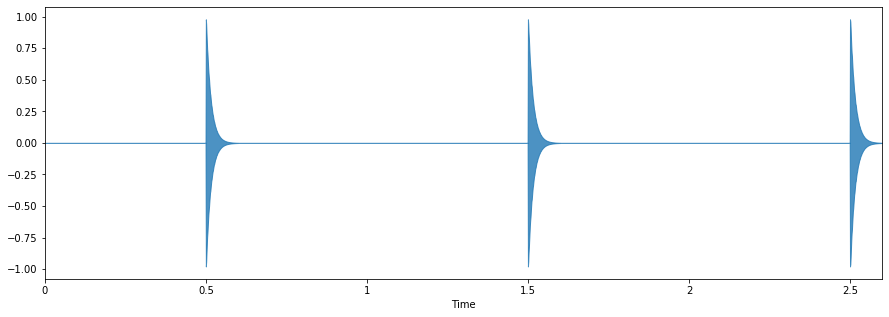

In [47]:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(x, sr, alpha=0.8)

plt.figure(figsize=(15, 5))
librosa.display.waveplot(y, sr, alpha=0.8)

plt.figure(figsize=(15, 5))
librosa.display.waveplot(z, sr, alpha=0.8)

plt.show()

## 时频谱(Spectrogram)

#### 短时傅里叶变换（stft）

计算声音在若干个小时间窗口上的频率的分布，时间窗口在时间轴上移动（时间窗口之间可能会有重叠）。

- n_fft

  时间窗口包含的采样数量
  
  例如：n_fft=2048，采样率=22050，则每个时间窗口的时长是2048/22050=0.093秒

- hop_length

  每次时间窗口移动，所跨过的采样数量
  
  例如：hop_length=512，采样率=22050，则时间窗口每次在时间轴上移动512/22050=0.023秒


In [50]:
hop_length = 512
n_fft = 2048
X = librosa.stft(x, n_fft=n_fft, hop_length=hop_length)
Y = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
Z = librosa.stft(z, n_fft=n_fft, hop_length=hop_length)

#### 某个时间的频率分布

Text(0.5, 0, 'Frequency (Hz)')

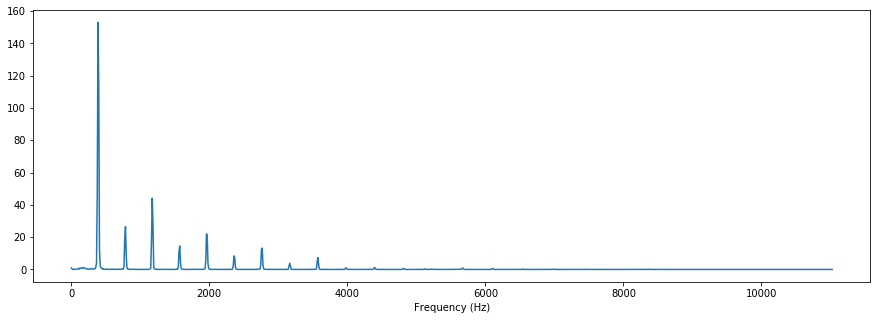

In [66]:
# 计算在time时的频率分布（秒）
time = 1.3

# 将time换算成这是第几个小窗口（frame）
frame_number = librosa.time_to_frames(time, sr=sr, hop_length=hop_length, n_fft=n_fft)

# 频率数组，以及在每个频率上的值
frequencys=librosa.fft_frequencies(sr=22050, n_fft=n_fft)
value_on_frequency = abs(X[:,frame_number])

# 作图
plt.figure(figsize=(15, 5))
plt.plot(frequencys, value_on_frequency)
plt.xlabel('Frequency (Hz)')

#### 不同时间的频率分布热图

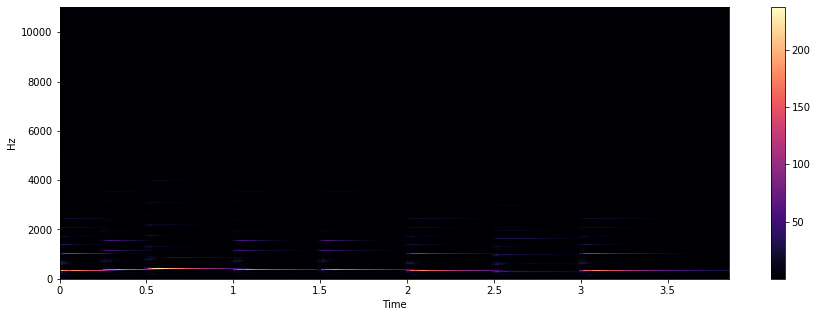

In [67]:
plt.figure(figsize=(15, 5))
librosa.display.specshow(abs(X), sr=sr, hop_length=hop_length, x_axis='time', y_axis='linear')
plt.colorbar()

#### 将分布数值转换为对数比例

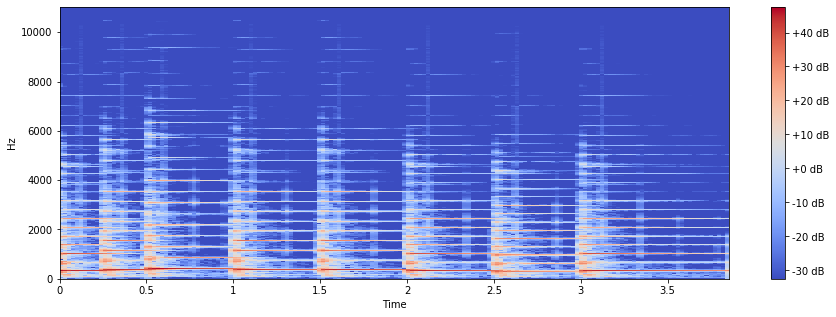

In [68]:
Sx = librosa.amplitude_to_db(abs(X))

plt.figure(figsize=(15, 5))
librosa.display.specshow(Sx, sr=sr, hop_length=hop_length, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')

## 保存音频文件

In [77]:
librosa.output.write_wav('audio/my_click.wav', z, sr)